# Traveling Salesperson Problem solved using Evolutionary Algorithms



* How to run the program.
    - pip install pandas, numpy
    - download european_cities.csv and keep it in the same folder as the notebook
    - run the imports
    - run everything else
    

## Introduction
In this exercise, I will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and compare their effectiveness with exhaustive search on a
difficult search problem without the use of EA-related libraries.


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesperson, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*

(The tours in the program are represented by permutations. The **itertools** module provides
a permutations function that returns successive permutations, which is useful for exhaustive search)

In [ ]:
# Imports - run these before any of the other cells
import itertools
import pandas as pd
import time
import random
import numpy as np
import matplotlib.pyplot as plt

## Exhaustive Search
First, we try to solve the problem by inspecting every possible tour for 6 cities. <br> Feel free to play with the amount of cities visited by changing ***city_count***

In [12]:
# Augment this to calculate paths with more cities
city_count = 6

start_time = time.time()
data = pd.read_csv("european_cities.csv", delimiter=";")
df = pd.DataFrame(data, columns = [
    "Barcelona",
    "Belgrade",
    "Berlin",
    "Brussels",
    "Bucharest",
    "Budapest",
    "Copenhagen",
    "Dublin",
    "Hamburg",
    "Istanbul",
    "Kiev",
    "London",
    "Madrid",
    "Milan",
    "Moscow",
    "Munich",
    "Paris",
    "Prague",
    "Rome",
    "Saint Petersburg",
    "Sofia",
    "Stockholm",
    "Vienna",
    "Warsaw"
])

def get_tour_distance(cities):
    """
    input
        array: cities
    returns
        float: distance
    """
    dest = itertools.cycle(cities)
    next(dest)
    distance = 0
    
    for city in cities:
        i = city_names.get_loc(next(dest))
        distance += df[city][i]
        
    return distance


def exhaustive(cities):
    route = cities
    shortest = get_tour_distance(cities)
    
    for permutation in itertools.permutations(cities,len(cities)):
        distance = get_tour_distance(permutation)
        if distance < shortest:
            shortest = distance
            route = permutation
    return route, shortest

city_names = df.columns[:city_count]
print(exhaustive(city_names))
print("runtime: %s seconds " % (time.time() - start_time))

(('Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels'), 5018.8099999999995)
runtime: 0.06807065010070801 seconds 



Running on my i5-8250U the order for the first 10 cities took 18 minutes and 44 seconds to calculate. <br>
The order is: <br>
('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade',
'Istanbul', 'Bucharest', 'Budapest', 'Berlin') <br>
with a tour distance of 7486.309999999999

As we can see the run time complexity of this algorithm is O(n!). <br>
To calculate all 24 of the cities it would probably take 24!/10! = 1.7097895e+17 times as long <br>
which is about 1.7097895e+17 * 1124 seconds  <br>
= 1.9218034e+20 seconds or 6.0939985e+12 years<br>
Let us therefore explore some other techinques for finding the shortest path.

## Hill Climbing
This is a simple hill climber I'll use to solve the TSP. <br>
Since this is a stochastic algorithm I'll run it 20 times with random initialization and report the best, worst and mean tour length as well as the standard deviation.<br>
Both with the first 10 cities, to compare with our previous exhaustive search method and with the full 24 cities.

In [8]:
def hill_climbing(cities, iterations):
    best_sol = list(cities)
    n = 0
    while n < iterations:
        for x in range(len(cities)):
            for y in range(len(cities)):
                sol = best_sol.copy()
                temp = sol[x]
                sol[x] = sol[y]
                sol[y] = temp
                n += 1
                if get_tour_distance(sol) < get_tour_distance(best_sol):
                    best_sol = sol
                if n >= iterations:
                    return best_sol
                
    return best_sol

def test_hill_climbing(cities, iterations, tests):
    # optional seed
    random.seed(3050)
    
    mean_sum = worst_tour = best_tour = get_tour_distance(cities)
    tour_list = []
    
    for n in range(tests):
        permutation = list(cities)
        random.shuffle(permutation)
        tour = get_tour_distance(hill_climbing(permutation, iterations))
        tour_list.append(tour)
        if tour < best_tour:
            best_tour = tour
        elif tour > worst_tour:
            worst_tour = tour
        mean_sum += tour
    mean = mean_sum/tests
    print("\nWith",len(permutation),"cities\n- best tour:", best_tour,"\n- worst tour:", worst_tour ,"\n- mean tour:", mean)
    # report the standard deviation of the runs
    variation_sum = 0
    for tour in tour_list:
        variation_sum = (tour-mean)**2
    std = np.sqrt(variation_sum/tests)
    print("- standard deviation:", std)
    
    
city_names = df.columns[:10]
test_hill_climbing(city_names, 20, 20)

city_names = df.columns[:24]
test_hill_climbing(city_names, 20, 20)


With 10 cities
- best tour: 8366.009999999998 
- worst tour: 13125.68 
- mean tour: 10628.863
- standard deviation: 505.98931310893335

With 24 cities
- best tour: 24200.879999999994 
- worst tour: 33118.98 
- mean tour: 29337.6745
- standard deviation: 354.1203836232993


## Genetic Algorithm
As the main part of this project I'll write a genetic algorithm to solve the TSP. <br>
We'll examine the algorithim with three different population sizes. <br>
For the crossover operators we'll use single mutations, and PMX. <br>
PMX or partially mapped crossover, is used to ensure the individuals still represent a valid permutation after the crossover.
To compare it with the others algorithms we will note the best, worst, mean and standard deviation of the tour lenghts, out of 20 runs. <br>
Here the tours selected are for each population the best individua of the last generation. <br>
To get a better feel of the progression we'll track the best fit individual of each generation and plot the results for each population.


The stats for 20 runs of 5 individuals over 100 generations 
- best tour: 17186.96 
- worst tour: 22390.440000000002 
- mean tour: 20450.44 
- standard deviation: 1398.8242305879612
runtime: 3.720670700073242 seconds 

The stats for 20 runs of 20 individuals over 30 generations 
- best tour: 17619.489999999998 
- worst tour: 22149.609999999997 
- mean tour: 19816.807999999997 
- standard deviation: 1213.8615489733575
runtime: 3.279597520828247 seconds 

The stats for 20 runs of 100 individuals over 5 generations 
- best tour: 19033.470000000005 
- worst tour: 22815.58 
- mean tour: 21043.153500000004 
- standard deviation: 874.000924926713
runtime: 3.514219045639038 seconds 


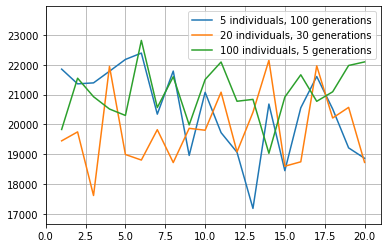

In [10]:
def get_random_tour(cities):
    permutation = list(cities)
    random.shuffle(permutation)
    return permutation

def mutate(order):
    """
    Swaps two elements of a permutation and returns it
    """
    x = int(random.random()*len(order))
    y = int(random.random()*len(order))
    # force the mutation to happen
    while y == x:
        y = int(random.random()*len(order))
    new_order = list(order)
    temp = new_order[x]
    new_order[x] = new_order[y]
    new_order[y] = temp
    
    return new_order

def crossover(parent1, parent2):
    """
    partially mapped crossover for permutation
    
    input
        array: order1
        array: order2
    returns
        array: child1
        array: child2
    """ 
    cut1 = int(np.floor(np.random.random()*(len(parent1)-1)))
    cut2 = int(np.floor(np.random.random()*(len(parent1)-cut1))+cut1+1)
    child1 = ['' for i in range(len(parent1))]
    child2 = child1.copy()
    for i in range(cut1, cut2):
        child1[i] = parent1[i]
        child2[i] = parent2[i]
    missing1 = []
    missing2 = []
    for i in range(cut1):
        if parent2[i] not in child1:
            child1[i] = parent2[i]
        else:
            missing1.append(i)
        if parent1[i] not in child2:
            child2[i] = parent1[i]
        else:
            missing2.append(i)
    for i in range(cut2, len(parent1)):
        if parent2[i] not in child1:
            child1[i] = parent2[i]
        else:
            missing1.append(i)
        if parent1[i] not in child2:
            child2[i] = parent1[i]
        else:
            missing2.append(i)
    j = 0
    k = 0
    for num in parent2:
        if num not in child1:
            child1[missing1[j]] = num
            j += 1
    for num in parent1:
        if num not in child2:
            child2[missing2[k]] = num
            k += 1
            
    return child1,child2

def random_pick(population, avoid=""):
    """
    Picks a random individual, except a specified one, if specified
    input
        array: population
        string: avoid
    returns
        string: random_pick
    """
    random_pick = population[int(random.random()*len(population))]
    # ensure the random pick is not an unwanted order
    while random_pick == avoid:
        random_pick = population[int(random.random()*len(population))]
    return random_pick

def get_best_individual(population):
    """
    input
        array: population
    returns
        array: best_order - array of city names
    """
    best_order = population[0]
    best_distance = get_tour_distance(best_order)
    for gene in population:
        distance = get_tour_distance(gene)
        if distance < best_distance:
            best_distance = distance
            best_order = gene
    return best_order
    
def next_generation(population, elite_percentage, mutation_percentage):
    """
    Handles the passing of a generation for a population
    input
        array: population
        int: elite_percentage - 0 to 100
        int: mutation_percentage - 0 to 100
    returns
        array: next_generation
    """
    next_generation = population.copy()
    # unless the user specifies the elite percentage to be zero, there will be at least one elite
    elite_count = np.ceil(elite_percentage/100*len(population)).astype('int')
    # save the current best solution as the first element, 
    # this will be overwritten if the elite_count is 0
    best_order = get_best_individual(population)
    next_generation[0] = best_order
    
    # crossover
    for i in range(1,elite_count):
        # save crossovers with the best solution as a percentage of the next generation
        partner = random_pick(population, best_order)
        child1, child2 = crossover(best_order, partner)
        # pick the fittest child
        survivor = child1 if get_tour_distance(child1) < get_tour_distance(child2) else child2
        # save mutations of the best solution as a percentage of the next generation
        if random.random()*100 > mutation_percentage:
            survivor = mutate(survivor)
        next_generation[i] = survivor
        
    # include random solutions which are not the best to increase diversity
    for i in range(elite_count, len(population)):
        random_solution = random_pick(population, best_order)
        # always mutate them in hopes of finding something better
        next_generation[i] = mutate(random_solution)
    return next_generation


def genetic(cities, pop_size, generations, elite_percentage, mutation_percentage):
    """
    genetic algorithm to solve TSP problem
    input
        array: cities - array of city names
        int: pop_size - amount of individuals in the population
        int: generations - how many generations which pass
        int: elite_percentage - 0 to 100
        int: mutation_percentage - 0 to 100
    returns
        array: population - array of solutions which are arrays of city names
    """
    population = []
    for pop in range(pop_size):
        population.append(get_random_tour(cities))
    for gen in range(generations):
        population = next_generation(population, elite_percentage, mutation_percentage)
    return population

def test_genetic(cities):
    population_sizes = [5, 20, 100]
    generations = [100, 30, 5]
    elite_percentage = 30
    mutation_percentage = 80
    runs = 20
    graph_values = []
    
    for i in range(len(population_sizes)):
        start_time = time.time()
        # first run initialization
        new_pop = genetic(cities, population_sizes[i], generations[i], elite_percentage, mutation_percentage)
        best = worst = mean_sum = get_tour_distance(get_best_individual(new_pop))
        tour_list = [best]
        for run in range(1, runs):
            new_pop = genetic(cities, population_sizes[i], generations[i], elite_percentage, mutation_percentage)
            pop_best = get_tour_distance(get_best_individual(new_pop))
            tour_list.append(pop_best)
            if pop_best < best:
                best = pop_best
            elif pop_best > worst:
                worst = pop_best
            mean_sum += pop_best
        mean = mean_sum/runs
        variation_sum = 0
        graph_values.append(tour_list)
        for tour in tour_list:
            variation_sum += (tour-mean)**2
        std = np.sqrt(variation_sum/runs)

        print("\nThe stats for", runs,"runs of", population_sizes[i],"individuals over", generations[i],"generations \n- best tour:", best,"\n- worst tour:", worst ,"\n- mean tour:", mean,"\n- standard deviation:", std)
        print("runtime: %s seconds " % (time.time() - start_time))
    for i in range(len(graph_values)):
        plt.plot(range(1, runs+1), graph_values[i], label=str(population_sizes[i])+" individuals, "+str(generations[i])+" generations" )
    # prettifying the graph
    all_values = list(itertools.chain.from_iterable(graph_values))
    plt.ylim(0.97*min(all_values), 1.05*max(all_values))
    plt.xlim(0,runs+1)
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    
city_names = df.columns[:24]
test_genetic(city_names)


As we can see the GA found the found the verified shortest tour for 10 cities.
<br>
With population and generations set to 20 the GA can consistently get the shortest tour for 10 cities, <br>
this takes 2.7867 seconds which is over 403 times faster than the exhaustive search.

For 24 cities our lives are not long enough to get an answer from the exhaustive search, <br>
but the GA found a route of 12325.93 in 641 seconds. 

We can calculate the amount of tours inspected by the GA as follows.<br>
generations*(population + children_measured)*cities <br>
= generations*(population + 2*(elite_count-1))*cities <br>
= generations*(population + 2*(population*elite_percentage/100-1))*cities <br>
= generations*(poplation*(1 + 2*elite_percentage/100) - 2)*cities <br>

for 20 runs, 20 generations, 10 cities and an elite percentage of 30 this is <br>
20*(20*(1 + 2*30/100) - 2))*10 <br>
= 6000 tours <br>
We know the runtime of exhaustive search is O(n!) <br>
so for 10 cities, 10! = 3628800 tours. <br>
<br>
for 24 cities it would be <br>
24! = 6.204484e+23 tours for exhaustive and <br>
14400 tours for the GA